### Discovery Significance vs Mass

This notebook makes a p0 plot a scan of the discovery significance vs mass for the H->gg case


We read first the file with the workspace and we retrieve the needed objects

In [1]:
  // Check if example input file exists
  TFile *file = TFile::Open("HiggsBinModel.root");

  // get the workspace out of the file
  RooWorkspace* w = (RooWorkspace*) file->Get("w");


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
 // get the data out of the file
  RooAbsData* data = w->data("data");

In [3]:
  // get the modelConfig (S+B) out of the file
  // and create the B model from the S+B model
  RooStats::ModelConfig*  sbModel = (RooStats::ModelConfig*) w->obj("ModelConfig");
  sbModel->SetName("S+B Model");      
  RooRealVar* poi = (RooRealVar*) sbModel->GetParametersOfInterest()->first();
  poi->setVal(200);  // set POI snapshot in S+B model for expected significance
  sbModel->SetSnapshot(*poi);
  RooStats::ModelConfig * bModel = (RooStats::ModelConfig*) sbModel->Clone();
  bModel->SetName("B Model");      
  poi->setVal(0);
  bModel->SetSnapshot( *poi  );

In [4]:
vector<double> masses;
vector<double> p0values;
vector<double> p0valuesExpected;
double massMin, massMax; 

###   Loop on the mass values

Perform a loop between the given values and perform an asymptotic hypothesis test to compute the p-value at each scanned mass point

In [5]:
massMin = 112;
massMax = 158;
// use Minuit2
ROOT::Math::MinimizerOptions::SetDefaultMinimizer("Minuit2");


int npoints = 30;
for( double mass=massMin; mass<=massMax; mass += (massMax-massMin)/double(npoints) )
  {
      
      
     cout << endl << endl << "Running for mass: " << mass << endl << endl;
     w->var("mass")->setVal( mass );

     RooStats::AsymptoticCalculator ac(*data, *sbModel, *bModel);
     ac.SetOneSidedDiscovery(true);  // for one-side discovery test                                      
     RooStats::AsymptoticCalculator::SetPrintLevel(-1);


     RooStats::HypoTestResult* asymCalcResult = ac.GetHypoTest();
 
     asymCalcResult->Print();
     
     masses.push_back( mass );
     p0values.push_back( asymCalcResult->NullPValue() );
  
     double expectedP0 = RooStats::AsymptoticCalculator::GetExpectedPValues(  asymCalcResult->NullPValue(),  asymCalcResult->AlternatePValue(), 0, false);
     p0valuesExpected.push_back( expectedP0 );
     std::cout << "expected p0 = " << expectedP0 << std::endl;

  }




Running for mass: 112

[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize - Find  best unconditional NLL on observed data
AsymptoticCalculator::EvaluateNLL  ........ using Minuit2 / Migrad with strategy  1 and tolerance 1
Minuit2Minimizer: Minimize with max-calls 2000 convergence for edm < 1 strategy 1


Info in <Minuit2>: VariableMetricBuilder: no improvement in line search
Info in <Minuit2>: VariableMetricBuilder: iterations finish without convergence.
Info in <Minuit2>: VariableMetricBuilder : edm = 0.0337973
Info in <Minuit2>:             requested : edmval = 0.001
Info in <Minuit2>: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in <Minuit2>: Current  Edm is : edm = 0.107272
Info in <Minuit2>: Required Edm is : edmval = 0.001


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -170109.145464930712
Edm   = 0.000125953395849236763
Nfcn  = 285
a1	  = 7.17599	 +/-  0.697268	(limited)
a2	  = -1.4775	 +/-  0.258925	(limited)
nbackground	  = 30686.5	 +/-  199.456	(limited)
nsignal	  = 85.504	 +/-  99.3692	(limited)
AsymptoticCalculator::EvaluateNLL -  value = -170109	fit time : Real time 0:00:01, CP time 1.750
[#0] PROGRESS:Eval -- Best fitted POI value = 85.504 +/- 99.3692
[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set
[#1] INFO:InputArguments -- AsymptoticCalculator: Asimov data will be generated using fitted nuisance parameter values
MakeAsimov: Setting poi nsignal to a constant value = 200
MakeAsimov: doing a conditional fit for finding best nuisance values 
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1


Info in <Minuit2>: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in <Minuit2>: Current  Edm is : edm = 0.159929
Info in <Minuit2>: Required Edm is : edmval = 0.001


Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -170108.725160311966
Edm   = 2.6716766430295812e-06
Nfcn  = 67
a1	  = 6.50658	 +/-  0.635148	(limited)
a2	  = -1.23666	 +/-  0.239541	(limited)
nbackground	  = 30571.8	 +/-  175.405	(limited)
fit time Real time 0:00:00, CP time 0.570
RooDataSet::AsimovData[x,weight:binWeightAsimov] = 100 entries (30771.6 weighted)
Generated Asimov data for observables RooArgSet:: = (x)
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize Find  best conditional NLL on ASIMOV data set for given alt POI ( nsignal ) = 200
AsymptoticCalculator::EvaluateNLL  ........ using Minuit2 / Migrad with strategy  1 and tolerance 1
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -170120.886839846207
Edm   = 0.000216770908972535424
Nfcn  = 41
a1	  = 6.50638	 +/-  0.634922	(limited)
a2	  = -1.23673	 +/-  0.239455	(limited)
nbackground	  = 30571.6	 +/-  175.409	(limited)
Asymptot

Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Edm is above max


[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set
[#0] WARNING:Minization -- AsymptoticCalculator:  unconditional fit failed before - retry to do it now 
[#0] WARNING:Minization -- AsymptoticCalculator:  Found a better unconditional minimum  old NLL = nan old muHat 6.25251
[#0] WARNING:Minization -- AsymptoticCalculator:  New minimum  found for                           NLL = -170109    muHat  6.44415

Results HypoTestAsymptotic_result: 
 - Null p-value = 0.470968
 - Significance = 0.0728361
 - CL_b: 0.470968
 - CL_s+b: 0.957038
 - CL_s: 2.03206
expected p0 = 0.0367162


Running for mass: 115.067

[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set
[#0] WARNING:Minization -- AsymptoticCalculator:  Found a negative value of the qmu - retry to do the unconditional fit 
[#0] WARNING:Minization -- AsymptoticCalculator:  Found a better unconditional minimum  old NLL = -170109 old muHat 0.000282708
[#0] WARNING:Minization -- AsymptoticCalculator:  New mini

Create a plot with the obtained p-values

In [6]:
  TGraph * graph1  = new TGraph(masses.size(),&masses[0],&p0values[0]);
  TGraph * graph2  = new TGraph(masses.size(),&masses[0],&p0valuesExpected[0]);

  graph1->SetMarkerStyle(20);
  graph1->Draw("APC");
  graph2->SetLineStyle(2);
  graph2->Draw("C");
  graph1->GetXaxis()->SetTitle("mass");
  graph1->GetYaxis()->SetTitle("p0 value");
  graph1->SetTitle("Significance vs Mass");
  graph1->SetMinimum(graph2->GetMinimum());
  graph1->SetLineColor(kBlue);
  graph2->SetLineColor(kRed);
  gPad->SetLogy(true);

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


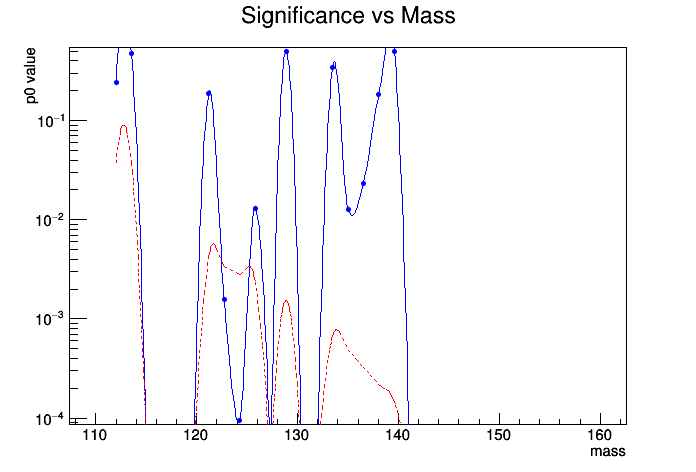

In [7]:
gPad->Draw()